# Step2 最尤推定
## 2.1 生成モデルの概要
### 2.1.1 生成モデルとは
- 生成モデルの目標は，あるデータ $`x`$ の確率分布 $`p(x)`$ をモデル化すること．
### 2.1.2 母集団とサンプル
- 母集団という膨大なサイズの対象から，数が限られたサンプルを使い，モデルを「推定」する．
- 確率分布の推定のために以下の２つの作業を行う．
    1. モデル化: 真の確率分布が「パラメータで調整可能な確率分布」(正規分布など)で近似されると仮定する．
    2. パラメータ推定: その確率分布がサンプルデータに合うようにパラメータを推定する．

## 2.2　実データを使った生成モデルの実装
1993年の香港の18歳の身長のデータ25000件のデータセットを使用する．

### 2.2.1 身長データセットの読み込み

[167.089607 181.648633 176.2728   ... 164.334317 171.524117 174.949129]


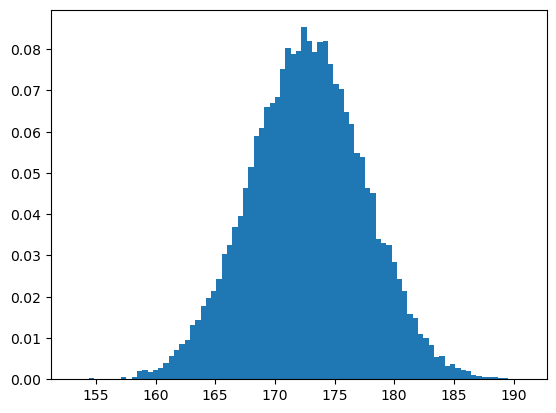

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

path = 'height.txt'
# python では __file__ を使って，現在のファイルの場所を取得することができるが，ipynb ではそれはできない．
xs = np.loadtxt('height.txt')
print(xs) # (25000, )

# ヒストグラム
plt.hist(xs, bins='auto', density=True)
plt.xlabel = ('Height(cm)')
plt.ylabel = ('Probability Density') # 確率密度
plt.show()

- グラフは正規分布のような形をしている．
- 身長の確率分布を正規分布としてモデル化することにする．

### 2.2.2 正規分布による生成モデル
以下の２つの作業で，正規分布の生成モデルを実装する．
1. モデル化: 真の確率分布が正規分布で近似されると仮定する．
2. パラメータ推定: サンプルをもとに，正規分布のパラメータを推定する．

パラメータの推定方法として「最尤推定」がある．

172.70250853667997
4.830167473396299


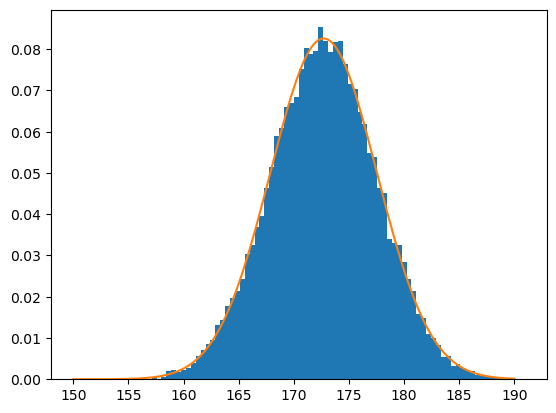

In [8]:
# xs は25000個の要素を持つ1次元配列
mu = np.mean(xs)
sigma = np.std(xs)

print(mu)
print(sigma)

# 正規分布の関数
def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu) ** 2 / (2 * sigma**2))
    return y

x = np.linspace(150, 190, 1000)
y = normal(x, mu, sigma)

# グラフの描画
plt.hist(xs, bins='auto', density=True)
plt.plot(x, y)
plt.xlabel = ('Height(cm)')
plt.ylabel = ('Probability Density')
plt.show()

ヒストグラムと正規分布がよく一致していることがわかる．

## 2.3 最尤推定の理論
